# Random Forest

## 1) 기본 Package 설정

In [1]:

# 기본
import numpy as np
import matplotlib.pyplot as plt # Graph

# 데이터 가져오기
import pandas as pd
from sklearn import datasets

# 데이터 전처리
from sklearn.preprocessing import StandardScaler    # 연속 변수 표준화
from sklearn import preprocessing                   # 범주형 변수 수치화
from sklearn.preprocessing import LabelEncoder      # 범주형 변수 수치화

# 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split    # 훈련과 테스트를 위한 데이터 분리

# 분류 모델
from sklearn.tree import DecisionTreeClassifier         # 의사결정나무
# from sklearn.naive_bayes import GaussianNB            # 나이브 베이즈 분류
# from sklearn.neighbors import KNeighborsClassifier    # K-최근접 이웃
from sklearn.ensemble import RandomForestClassifier     # 랜덤 포레스트
# from sklearn.linear_model import LogisticRegression   # 로지스틱 회귀분석
# from sklearn.svm import SVC                           # SVM(서포트벡터머신)
# from sklearn.neural_network import MLPClassifier      # 다층 인공신경망
# from sklearn.ensemble import VotingClassifier         # 과반수 투표(Majority Voting) 
# from sklearn.ensemble import BaggingClassifier        # 배깅(Bagging) 
# from sklearn.ensemble import AdaBoostClassifier       # 부스팅(Boosting) 

# 모델 검정
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer  # 정확도, 민감도 등
from sklearn.metrics import roc_curve, roc_auc_score, auc   # ROC 곡선

# 최적화
from sklearn.model_selection import cross_validate, cross_val_score  # 교차 타당도
from sklearn.pipeline import make_pipeline  # 파이프라인 구축
from sklearn.model_selection import learning_curve, validation_curve # 학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV    # 하이퍼파라미터 튜닝

## 2) 데이터 가져오기

### 2-1) 데이터 프레임으로 저장
* csv 데이터를 dataframe으로 가져오기

In [2]:
train = pd.read_csv('../Data/train.csv')

# train data의 상위 5개 출력
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


### 2-2) 자료구조 살펴보기

In [3]:
# null값 확인
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB
None


In [4]:
# 배열의 행, 열 갯수 확인
print(train.shape)

(54808, 13)


In [5]:
# column 값 확인
train.keys()

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

## 3) 데이터 전처리
### 3-1) ONE HOT ENCODING
- 범주형 변수는 먼저 숫자로 변경해주어야 한다.
- one-hot-encoding을 통해 string을 integer로 변환할 수 있다

In [6]:
train_df = pd.get_dummies(train)

In [7]:
# train_df data의 상위 5개 출력
train_df.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,0,49,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,60,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,50,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,50,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,73,0,0,0,...,0,0,1,0,0,0,1,1,0,0


### 3-2) null값 변경

In [8]:
# null값을 평균 값으로 대체
train_df['previous_year_rating'].fillna(train_df['previous_year_rating'].mean(),inplace=True)

In [9]:
# null값 반영 여부 확인
print(f'데이터 셋의 Null 값 개수:{train_df.isnull().sum().sum()}')

데이터 셋의 Null 값 개수:0


### 3-3) Data와 Target으로 분리
- 필요한 data만 추출
- data : `X`, taget : `y`로 분리

In [10]:
# data
X = train_df.drop(['employee_id','is_promoted'], axis=1)
X.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,0,49,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,1,30,5.0,4,0,60,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,34,3.0,7,0,50,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2,39,1.0,10,0,50,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,1,45,3.0,2,0,73,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [11]:
# target
y=train_df['is_promoted']
np.bincount(y)

array([50140,  4668])

## 4) 훈련 / 검증용 데이터 분할

In [12]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size = 0.3,   # test set의 비율
                     random_state = 1,  # 무작위 시드 번호
                     stratify = y)      # 결과 레이블의 비율대로 분리

## 5) 모델 구축

In [13]:
tree = DecisionTreeClassifier(max_depth=None, #수정
                              criterion='entropy',
                              random_state=1)

forest = RandomForestClassifier(criterion='gini', # 수정
                                n_estimators=500,
                                random_state=1)

## 6) 모델 검정

훈련용 데이터의 정확도와 검증용 데이터의 정확도를 비교하며 검증하는 것이 일반적이다.   
이외에 검증용 데이터로 예측하는 방법도 존재한다.   
`predict()` : class의 결과값으로 표시  
`predict_proba()` : 확률 값으로 표시  

### 6-1) AUC 검정

In [14]:
clf_labels = ['Decision tree', 'Random forest']
all_clf = [tree, forest] # 수정

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print(f"ROC AUC: {scores.mean():.3f} (+/- {scores.std():.3f}) [{label}]")

ROC AUC: 0.670 (+/- 0.019) [Decision tree]
ROC AUC: 0.782 (+/- 0.018) [Random forest]


### 6-2) ROC 곡선

model 검정에서 가장 많이 쓰이는 방식은 **ROC**를 이용하는 것이다.   
보통, `1 - 특이도` 로 계산하기 때문에 민감도(TPR)이 높고 `1 - 특이도`(FPR)은 낮을 수록 좋은 모델이라고 볼 수 있다.


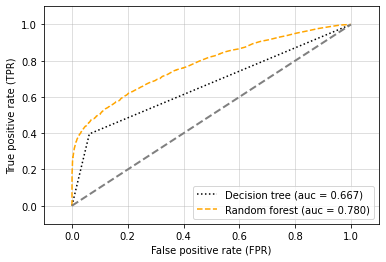

In [15]:
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

for clf, label, clr, ls \
        in zip(all_clf, clf_labels, colors, linestyles):

    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

#### ROC 그래프 해석
![ROC Grahp](https://blog.kakaocdn.net/dn/mo0Bj/btq1TMN5sk2/vhZqoLcaPWKyaRNeg1AA71/img.png)

### 6-3) 정오분류표

In [16]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [17]:
y_pred = forest.predict(X_test)

In [18]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                        index=['True[0]','True[1]'],
                        columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],14960,83
True[1],998,402


In [19]:
# 정확도, 정밀도, 재현율, f1 score
print(f'잘못 분류된 샘플 개수: {(y_test != y_pred).sum()}')
print(f'정확도: {accuracy_score(y_test, y_pred):.3f}')
print(f'정밀도: {precision_score(y_true=y_test, y_pred=y_pred):.3f}')
print(f'재현율: {recall_score(y_true=y_test, y_pred=y_pred):.3f}')
print(f'F1: {f1_score(y_true=y_test, y_pred=y_pred):.3f}')

잘못 분류된 샘플 개수: 1081
정확도: 0.934
정밀도: 0.829
재현율: 0.287
F1: 0.427


#### 결과값을 해석하는 방법

|정오행렬|분류행렬|
|---|---|
|정확도|오류율|
|TPR|FPR|
|민감도|특이도|
|재현율|정밀도|

실제로는 같은 식을 사용하기에 아래 3가지는 같은 의미이다.   
* TPR = 민감도(Sensitivity) = 재현율(Recall)   

정확도는 class 0과 1 모두를 정확하게 분류함   
오류율은 class 0과 1 모두를 정확하게 분류하지 못함  

TPR(True Positive Rate)는 실제 class 1 중에 잘 맞춘 것을 의미    
FPR(False Positive Rate)는 실제 calss 0 중에 못 맞춘 것을 의미    
* 때문에 FPR은 `1-FPR`로 많이 사용한다.   
*`1-FPR`은 특이도와 같다.*    

민감도는 실제 class 1 중에 잘 맞춘 것을 의미하므로 TPR과 같다.   
특이도는 실제 class 0 중에 잘 맞춘 것을 의미하므로 `1-FPR`이 된다.  

재현율(Recall)은 **실제** class 1 중에 잘 맞춘 것이므로 `민감도`, `TPR`과 다 동일하게 사용할 수 있다.   
정밀도(Precision)은 **예측** class 1 중에 잘 맞춘 것을 의미한다.   

이것을 모두 합쳐 사용하는 개념이 `F1`이다.    
실제로 잘 맞춘 것과 예측에서도 잘 맞춘 것을 한꺼번에 계산하는 것이다.    

$$F1 = 2 \times {{재현율\times정밀도} \over {재현율+정밀도}}$$    

때문에 F1값이 높은 model의 성능이 뛰어나다고 이야기 할 수 있다.  

## 7) RF 특성 중요도

결정 트리처럼 랜덤 포레스트도 각 트리의 특성 중요도를 취합하여 계산한 특성 중요도를 제공한다.   
일반적으로 랜덤 포레스트에서 제공하는 특성 중요도가 하나의 트리에서 제공하는 것보다 더 신뢰도가 높다.  

 0) avg_training_score             0.305407
 1) age                            0.150958
 2) length_of_service              0.124161
 3) previous_year_rating           0.063646
 4) awards_won?                    0.032348
 5) no_of_trainings                0.026033
 6) department_Sales & Marketing   0.021395
 7) department_Operations          0.018721
 8) recruitment_channel_other      0.017254
 9) recruitment_channel_sourcing   0.017234
10) gender_m                       0.012593
11) gender_f                       0.012550
12) region_region_2                0.011855
13) education_Bachelor's           0.010550
14) department_Analytics           0.010280
15) department_Procurement         0.010259
16) region_region_7                0.009100
17) department_Technology          0.008695
18) education_Master's & above     0.008299
19) region_region_22               0.007983
20) department_Finance             0.007888
21) region_region_15               0.006501
22) region_region_13            

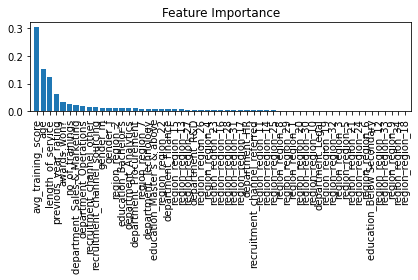

In [20]:
feat_labels = X.columns
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print(f"{f:>2d}) {feat_labels[indices[f]]:<30s} {importances[indices[f]]:.6f}")

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [21]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, 
                      threshold=0.1, 
                      prefit=True)

X_selected = sfm.transform(X_train)

print(f'이 임계 조건을 만족하는 샘플의 수: {X_selected.shape[1]}')

이 임계 조건을 만족하는 샘플의 수: 3


/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [22]:
for f in range(X_selected.shape[1]):
    print(f"{f:>2d}) {feat_labels[indices[f]]:<30s} {importances[indices[f]]:.6f}")

 0) avg_training_score             0.305407
 1) age                            0.150958
 2) length_of_service              0.124161
